# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Create path to main folder

In [2]:
path = r'C:\Users\João Pedro\MAR-Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\João Pedro\\MAR-Instacart Basket Analysis'

# Import data 

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'df_part2.pkl'))

In [5]:
df.head()

,user_id,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,...,State,age,date_joined,dependants,family_status,income,exist,region,exclusion_flag,customer_profile
0,138,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,28,6,11,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high activity,"low-income, senior"
1,138,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,30,6,17,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high activity,"low-income, senior"
3,138,907,Premium Sliced Bacon,106,12,20.0,2254091,10,5,14,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high activity,"low-income, senior"
4,138,1000,Apricots,18,10,12.9,505689,9,6,12,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high activity,"low-income, senior"
5,138,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,17,5,14,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high activity,"low-income, senior"


In [6]:
df.columns

Index(['user_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency', 'gender', 'State',
       'age', 'date_joined', 'dependants', 'family_status', 'income', 'exist',
       'region', 'exclusion_flag', 'customer_profile'],
      dtype='object')

## 9. Create Visualizations

# 9.1. Busiest days and hours for ordering

# Busiest days

Text(0.5, 1.0, 'Number of Orders per Day of the Week')

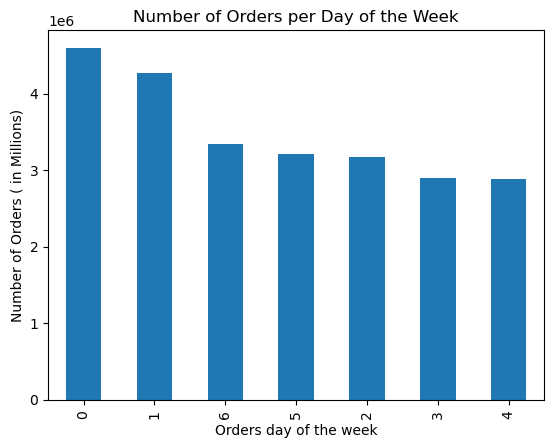

In [7]:
bz_day = df['orders_day_of_week'].value_counts().plot.bar()
bz_day.set_xlabel('Orders day of the week')
bz_day.set_ylabel('Number of Orders ( in Millions)')
bz_day.set_title('Number of Orders per Day of the Week')

# Export the chart

In [8]:
bz_day.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bz_day.png'))

# Busiest hours

Text(0.5, 1.0, 'Number of Orders per Hour/day')

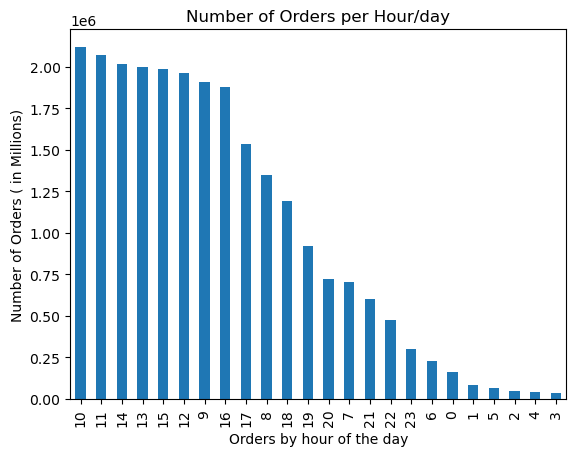

In [9]:
bz_hr = df['order_hour_of_day'].value_counts().plot.bar()
bz_hr.set_xlabel('Orders by hour of the day')
bz_hr.set_ylabel('Number of Orders ( in Millions)')
bz_hr.set_title('Number of Orders per Hour/day')

# Export the chart 

In [10]:
bz_hr.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bz_hr.png'))

# 9.2. Days and hours in which customers spend the most

# create a sample dataframe

In [11]:
np.random.seed(4)
dev=np.random.rand(len(df)) <= 0.8

# store 80% of the sample in the dataframe big

In [12]:
big = df[dev]

# store 20% of the sample in the dataframe small

In [13]:
small = df[~dev]

# create a dataframe that contains price and order_hour_of_day

In [14]:
df_s = small[['order_hour_of_day', 'prices']]

# Create a line graph

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Orders per Hour/day')

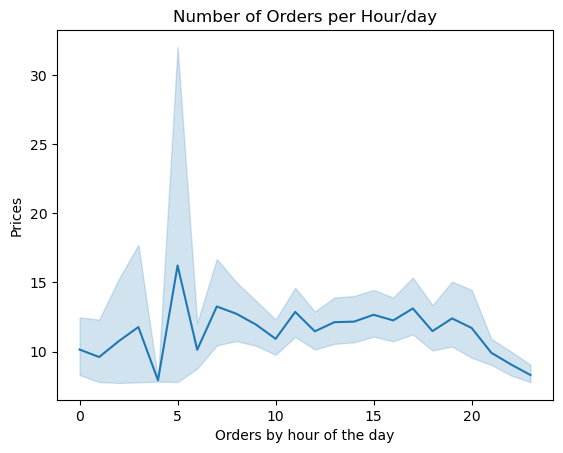

In [15]:
line_graph = sns.lineplot(data = df_s , x = 'order_hour_of_day' , y = 'prices')
line_graph.set_xlabel('Orders by hour of the day')
line_graph.set_ylabel('Prices')
line_graph.set_title('Number of Orders per Hour/day')

# Export the chart 

In [16]:
line_graph.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'price_hrs.png'))

# create a dataframe that contains price and orders_dat_of_day

In [17]:
df_d = small[['orders_day_of_week', 'prices']]

# Create a line graph

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Orders per Day of the Week')

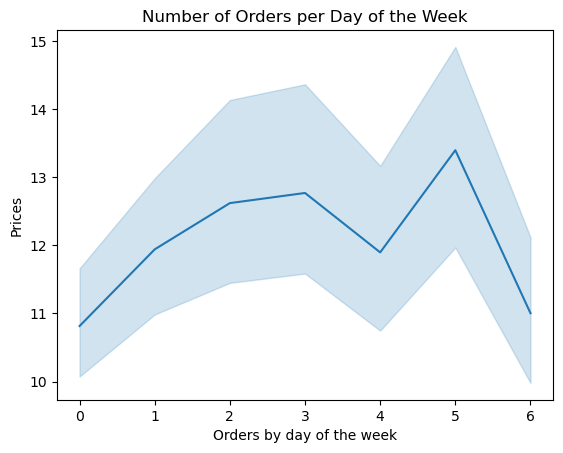

In [18]:
line_graph2= sns.lineplot(data = df_d , x = 'orders_day_of_week' , y = 'prices')
line_graph2.set_xlabel('Orders by day of the week')
line_graph2.set_ylabel('Prices')
line_graph2.set_title('Number of Orders per Day of the Week')

# Export the chart

In [19]:
line_graph2.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'price_day.png'))

# 9.3. Product price groupings

# Price classifications

In [20]:
df['price_range_loc'].value_counts()

price_range_loc
Mid-range product     16479445
Low-range product      7626745
High-range product      308687
Name: count, dtype: int64

# Total sum of price ranges

In [21]:
16479445+7626745+308687

24414877

# Percentage of Mid range products

In [22]:
(16479445/24414877)*100

67.49755487197416

# Percentage of Low range products

In [23]:
(7626745/24414877)*100

31.238105356828132

# Percentage of High range products

In [24]:
(308687/24414877)*100

1.2643397711977005

# Create a  pie chart with these proportions

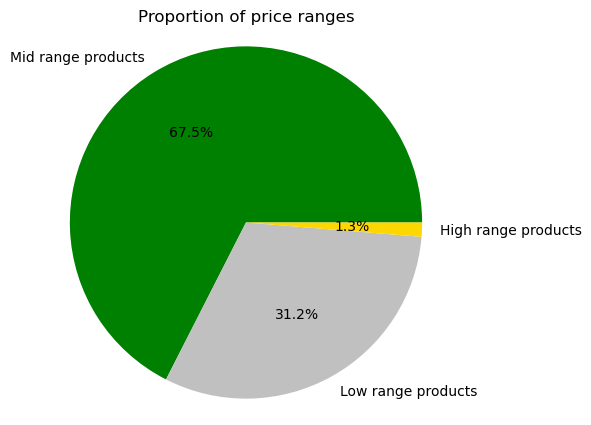

In [30]:
labels = ['Mid range products' , 'Low range products' , 'High range products' ]
sizes = [67.5, 31.2, 1.3]
colors = ['green','silver','gold']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0 )
plt.axis('equal')
plt.title('Proportion of price ranges')

plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'price_range.png'))

# Export the chart

In [28]:
plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'price_range.png'))

<Figure size 640x480 with 0 Axes>

# 9.4. Disered departments & products

# Desired departments 

Text(0.5, 1.0, 'Number of Users by Department')

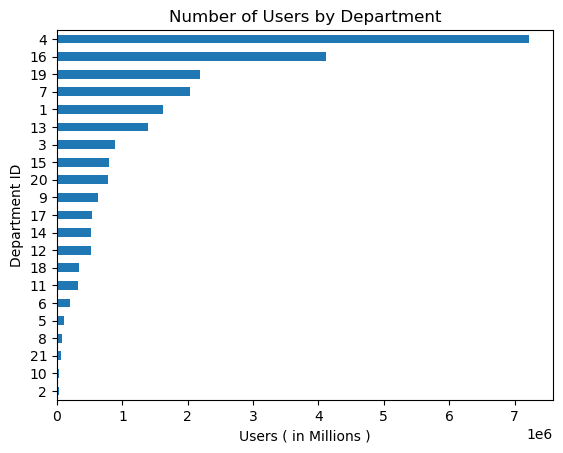

In [86]:
bar_departments = df['department_id'].value_counts().sort_values().plot.barh()
bar_departments.set_xlabel('Users ( in Millions )')
bar_departments.set_ylabel('Department ID')
bar_departments.set_title('Number of Users by Department')

# Export chart

In [87]:
bar_departments.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bar_dept.png'))

# Desired products

Text(0.5, 1.0, 'TOP 10 Products')

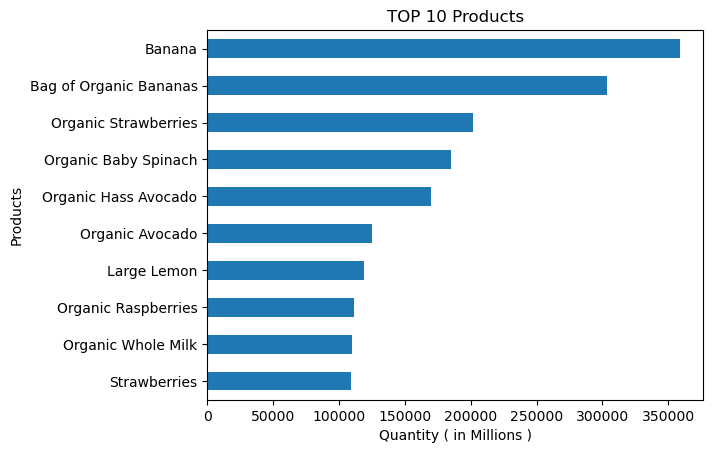

In [88]:
bar_products= df['product_name'].value_counts(dropna = False).head(10).sort_values(ascending = True).plot(kind = 'barh')
bar_products.set_xlabel('Quantity ( in Millions )')
bar_products.set_ylabel('Products')
bar_products.set_title('TOP 10 Products')

# Export

In [89]:
bar_products.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'bar_prod.png'), dpi=300, bbox_inches='tight')

# 9.5. Distribution of brand loyalty among customers

# Subset dataframe to analyze brand loyalty

In [90]:
df_br = df[['user_id','region','customer_profile','loyalty_flag']]

#  Creat graph by brand loyalty ( grouped ) by region 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

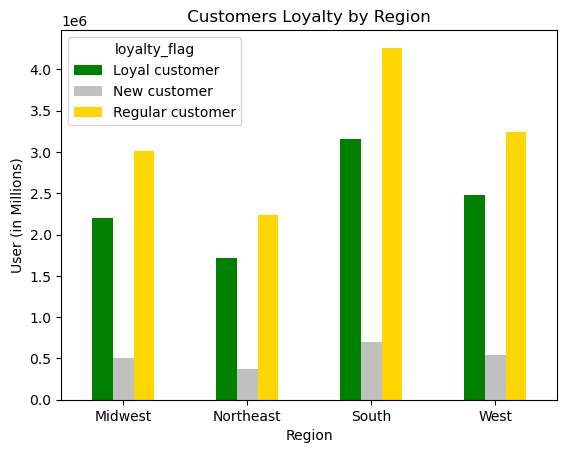

In [91]:
bar_groupregion = df_br.groupby(['region', 'loyalty_flag']).size().unstack()
x=bar_groupregion.plot(kind='bar', color = ['green','silver','gold'])
plt.xlabel('Region')
plt.ylabel('User (in Millions)')
plt.title(' Customers Loyalty by Region ')

plt.xticks(rotation = 0)

# Export

In [92]:
x.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'customerloyalty_reg.png'))

# Create graph brand loyalty by customer profile 

Text(0.5, 1.0, ' Customers Loyalty by Customer Profile ')

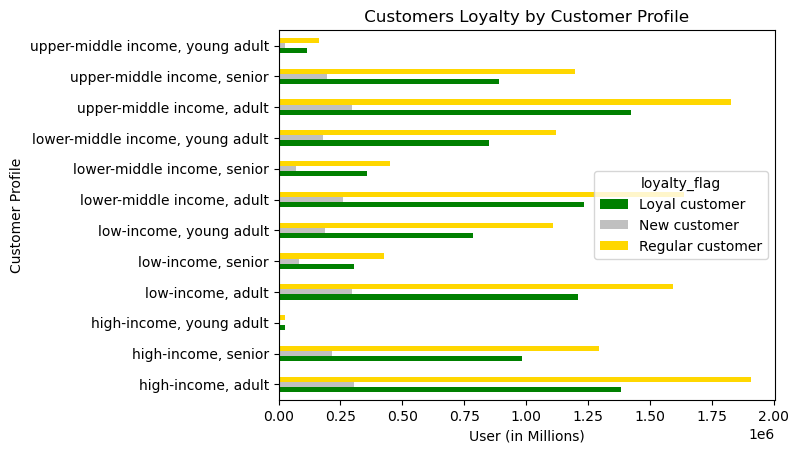

In [93]:
bar_groupcprofile = df.groupby(['customer_profile' ,'loyalty_flag']).size().unstack()
y=bar_groupcprofile.plot(kind='barh', color = ['green','silver','gold'])
plt.xlabel('User (in Millions)')
plt.ylabel('Customer Profile')
plt.title(' Customers Loyalty by Customer Profile ')


# Export

In [94]:
y.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'customerloyalty_cprofile.png'), dpi=300, bbox_inches='tight')

# 9.6. Ordering habits based on customer loyalty

# Subset dataframe to analyze ordering habits based on brand loyalty

In [95]:
df_ol = df[['order_frequency','customer_profile','loyalty_flag']]

## Create graph brand loyalty by customer habits

(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

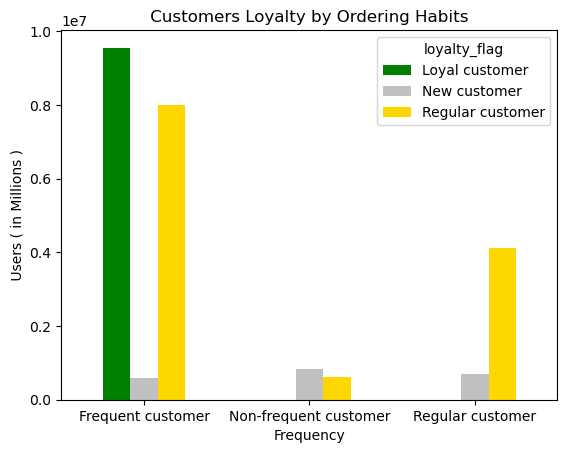

In [96]:
bar_groupchabits = df_ol.groupby(['order_frequency', 'loyalty_flag']).size().unstack()
x=bar_groupchabits.plot(kind='bar', color = ['green','silver','gold'])
plt.ylabel(' Users ( in Millions ) ')
plt.xlabel('Frequency')
plt.title(' Customers Loyalty by Ordering Habits ')


plt.xticks(rotation = 0)

# Export 

In [97]:
x.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'customerloyalty_orderinghabits.png'))

# 9.7. Ordering habits based on customer region

# Subset dataframe to analyze brand loyalty

In [98]:
df_or = df[['user_id','region','customer_profile','order_frequency']]

# Create graph based on habits by customer in region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

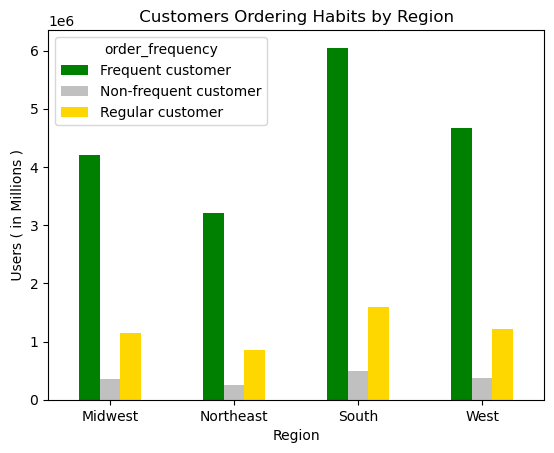

In [99]:
bar_grouphabitsregion = df_or.groupby(['region', 'order_frequency']).size().unstack()
x=bar_grouphabitsregion.plot(kind='bar', color = ['green','silver','gold'])
plt.ylabel(' Users ( in Millions ) ')
plt.xlabel('Region')
plt.title(' Customers Ordering Habits by Region ')
plt.xticks(rotation = 0)

# Export

In [100]:
x.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'customersordering_region.png'))

# 9.8. Customer profile, family status and ordering habits

# Subset dataframe to analyze brand loyalty

In [101]:
df_do = df[['age','family_status','customer_profile','order_frequency']]

# Create graph based on habits by customer profile 

Text(0.5, 1.0, ' Customers Ordering Habits by Profile ')

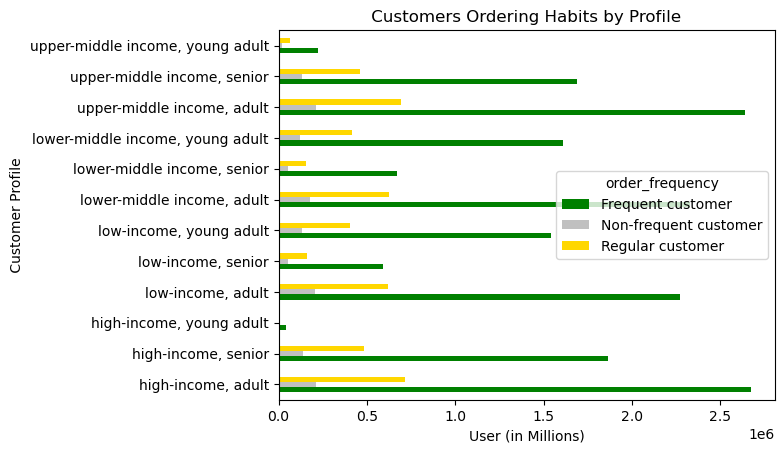

In [102]:
bar_grouphabitscprofile = df.groupby(['customer_profile' ,'order_frequency']).size().unstack()
y=bar_grouphabitscprofile.plot(kind='barh', color =['green','silver','gold'])
plt.ylabel(' Customer Profile ')
plt.xlabel('User (in Millions)')
plt.title(' Customers Ordering Habits by Profile ')

# Export 

In [103]:
y.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'customersordering_cprofile.png'), dpi=300, bbox_inches='tight')

# Family status and ordering habits

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

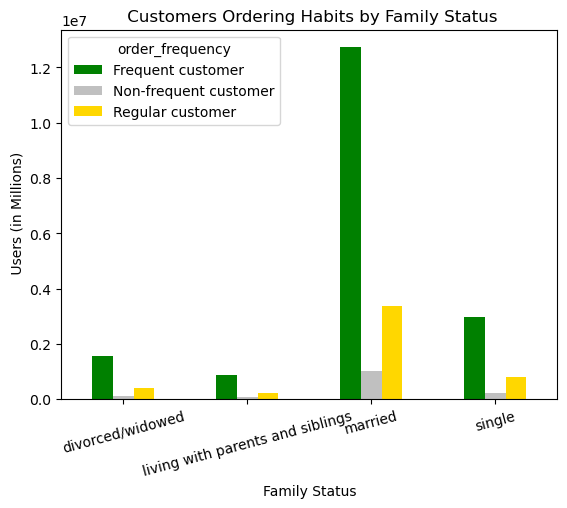

In [104]:
bar_status_habits = df.groupby(['family_status' ,'order_frequency']).size().unstack()
y=bar_status_habits.plot(kind='bar', color =['green','silver','gold'] )
plt.ylabel(' Users (in Millions)')
plt.xlabel('Family Status')
plt.title(' Customers Ordering Habits by Family Status')
plt.xticks(rotation = 15)


# Export 

In [105]:
y.figure.savefig(os.path.join(path, path, '04 Analysis' , 'Visualizations' , 'customersordering_famstatus.png'), dpi=300, bbox_inches='tight')

# 9.9. Spending habits based on customer profiles

# Subset dataframe to analyze spending

In [106]:
df_sh = df[['customer_profile','spending_flag']]

# Customer profile and spending habits

Text(0.5, 1.0, ' Customers Spending by Profile')

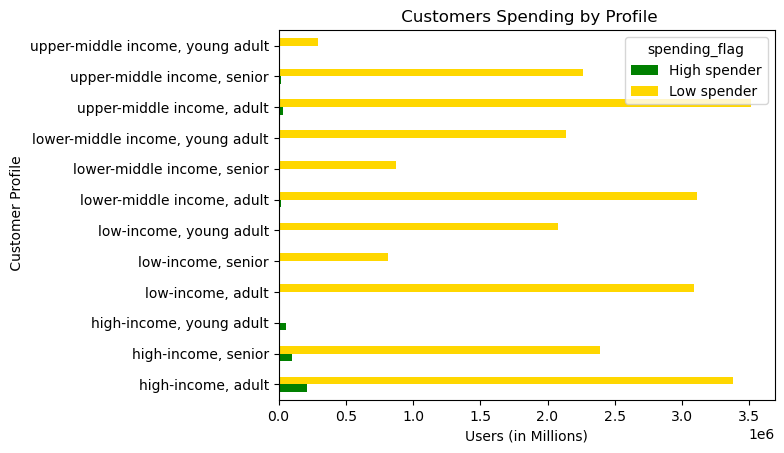

In [107]:
bar_spendingcprofile= df.groupby(['customer_profile' ,'spending_flag']).size().unstack()
y=bar_spendingcprofile.plot(kind='barh', color =['green','gold'] )
plt.ylabel(' Customer Profile')
plt.xlabel('Users (in Millions)')
plt.title(' Customers Spending by Profile')


# Export

In [108]:
y.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'customerspending_profile.png'), dpi=300, bbox_inches='tight')

# 9.10. Spending habits based on customer region

# Subset dataframe to analyze spending

In [109]:
df_sr = df[['region','spending_flag']]

# Customer profile and spending habits

Text(0.5, 1.0, ' Customers Spending by Region')

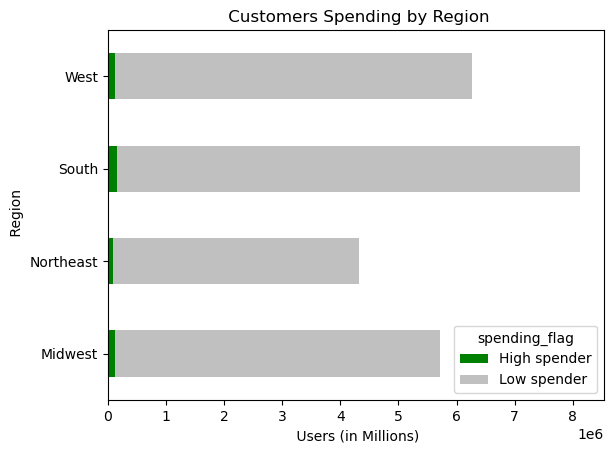

In [110]:
bar_spendingregion = df.groupby(['region' ,'spending_flag']).size().unstack()
y=bar_spendingregion.plot(kind='barh', stacked = True, color = ['green','silver','gold'] )
plt.ylabel(' Region')
plt.xlabel(' Users (in Millions)')
plt.title(' Customers Spending by Region')

# Export

In [111]:
y.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'customerspending_region.png'))